Sadia Islam Prova ID: 2020-3-60-012

Iftekhar Alam Sarker ID: 2020-3-60-035



Iftekhar Hossain Khan ID: 2020-3-60-073



In [ ]:
!wget https://downloads.apache.org/hadoop/common/hadoop-3.4.1/hadoop-3.4.1.tar.gz

--2024-11-20 16:11:28--  https://downloads.apache.org/hadoop/common/hadoop-3.4.1/hadoop-3.4.1.tar.gz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.208.237, 2a01:4f8:10a:39da::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 974002355 (929M) [application/x-gzip]
Saving to: ‘hadoop-3.4.1.tar.gz’

hadoop-3.4.1.tar.gz 100%[===================>] 928.88M  25.5MB/s    in 37s     

2024-11-20 16:12:06 (24.9 MB/s) - ‘hadoop-3.4.1.tar.gz’ saved [974002355/974002355]



In [ ]:
!tar -xzvf hadoop-3.4.1.tar.gz && cp -r hadoop-3.4.1/ /usr/local/

Streaming output truncated to the last 5000 lines.
hadoop-3.4.1/share/doc/hadoop/api/org/apache/hadoop/fs/cosn/auth/package-summary.html
hadoop-3.4.1/share/doc/hadoop/api/org/apache/hadoop/fs/cosn/auth/package-use.html
hadoop-3.4.1/share/doc/hadoop/api/org/apache/hadoop/fs/cosn/package-frame.html
hadoop-3.4.1/share/doc/hadoop/api/org/apache/hadoop/fs/cosn/package-summary.html
hadoop-3.4.1/share/doc/hadoop/api/org/apache/hadoop/fs/cosn/package-use.html
hadoop-3.4.1/share/doc/hadoop/api/org/apache/hadoop/fs/FSError.html
hadoop-3.4.1/share/doc/hadoop/api/org/apache/hadoop/fs/s3a/
hadoop-3.4.1/share/doc/hadoop/api/org/apache/hadoop/fs/s3a/class-use/
hadoop-3.4.1/share/doc/hadoop/api/org/apache/hadoop/fs/s3a/class-use/Constants.html
hadoop-3.4.1/share/doc/hadoop/api/org/apache/hadoop/fs/s3a/class-use/RemoteFileChangedException.html
hadoop-3.4.1/share/doc/hadoop/api/org/apache/hadoop/fs/s3a/class-use/AWSServiceIOException.html
hadoop-3.4.1/share/doc/hadoop/api/org/apache/hadoop/fs/s3a/class-

In [ ]:
#To find the default Java path and add export in hadoop-env.sh
JAVA_HOME = !readlink -f /usr/bin/java | sed "s:bin/java::"
java_home_text = JAVA_HOME[0]
java_home_text_command = f"$ {JAVA_HOME[0]} "
!echo export JAVA_HOME=$java_home_text >>/usr/local/hadoop-3.4.1/etc/hadoop/hadoop-env.sh

In [ ]:
import os
os.environ['HADOOP_HOME']="/usr/local/hadoop-3.4.1"
os.environ['JAVA_HOME']=java_home_text

In [ ]:
!/usr/local/hadoop-3.4.1/bin/hadoop

Usage: hadoop [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]
 or    hadoop [OPTIONS] CLASSNAME [CLASSNAME OPTIONS]
  where CLASSNAME is a user-provided Java class

  OPTIONS is none or any of:

buildpaths                       attempt to add class files from build tree
--config dir                     Hadoop config directory
--debug                          turn on shell script debug mode
--help                           usage information
hostnames list[,of,host,names]   hosts to use in worker mode
hosts filename                   list of hosts to use in worker mode
loglevel level                   set the log4j level for this command
workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

daemonlog     get/set the log level for each daemon

    Client Commands:

archive       create a Hadoop archive
checknative   check native Hadoop and compression libraries availability
classpath     prints the class path needed to get the Hadoop jar and the re

In [ ]:
!/usr/local/hadoop-3.4.1/bin/hadoop fs -mkdir ml-100k

In [ ]:
# Test Hadoop installation
!/usr/local/hadoop-3.4.1/bin/hadoop

# Step 2: Set up a sample data directory in HDFS
!/usr/local/hadoop-3.4.1/bin/hadoop fs -mkdir -p data
!cp /content/data.csv /content/data.csv
!/usr/local/hadoop-3.4.1/bin/hadoop fs -copyFromLocal /content/data.csv data/
!/usr/local/hadoop-3.4.1/bin/hadoop fs -ls data

# Install mrjob for Python MapReduce jobs
!pip install mrjob

Usage: hadoop [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]
 or    hadoop [OPTIONS] CLASSNAME [CLASSNAME OPTIONS]
  where CLASSNAME is a user-provided Java class

  OPTIONS is none or any of:

buildpaths                       attempt to add class files from build tree
--config dir                     Hadoop config directory
--debug                          turn on shell script debug mode
--help                           usage information
hostnames list[,of,host,names]   hosts to use in worker mode
hosts filename                   list of hosts to use in worker mode
loglevel level                   set the log4j level for this command
workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

daemonlog     get/set the log level for each daemon

    Client Commands:

archive       create a Hadoop archive
checknative   check native Hadoop and compression libraries availability
classpath     prints the class path needed to get the Hadoop jar and the re

In [ ]:

%%writefile UniqueValueCounter.py
from mrjob.job import MRJob

class UniqueValueCounter(MRJob):
    def mapper(self, _, line):
        # Access a static counter for the row number in the mapper function
        if not hasattr(self, 'row_count'):
            self.row_count = 0

        # Skip the first row if it's the header
        if self.row_count == 0:
            self.row_count += 1
            return
        else:
            self.row_count += 1

        # Process each line by splitting values
        values = line.strip().split(',')
        # Yield each value in the line as a key, with a count of 1
        for value in values:
            yield value, 1

    def reducer(self, key, counts):
        # Sum all occurrences of each unique value
        yield key, sum(counts)


if __name__ == '__main__':
    UniqueValueCounter.run()


Writing UniqueValueCounter.py


In [ ]:
!python UniqueValueCounter.py /content/data.csv>UniqueValueCounter.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/UniqueValueCounter.root.20241120.161820.522094
Running step 1 of 1...
job output is in /tmp/UniqueValueCounter.root.20241120.161820.522094/output
Streaming final output from /tmp/UniqueValueCounter.root.20241120.161820.522094/output...
Removing temp directory /tmp/UniqueValueCounter.root.20241120.161820.522094...


In [ ]:
cat UniqueValueCounter.txt

"1"	2159
"10"	246
"11"	182
"12"	117
"13"	78
"14"	77
"15"	55
"16"	46
"17"	29
"18"	14
"19"	14
"2"	1643
"20"	9
"21"	11
"22"	4
"23"	6
"24"	1
"26"	1
"27"	1
"28"	1
"29"	3
"3"	1297
"32"	1
"4"	1005
"5"	855
"6"	644
"7"	545
"8"	438
"9"	350
"Instant food products"	79
"UHT-milk"	329
"abrasive cleaner"	35
"artif. sweetener"	32
"baby cosmetics"	6
"baby food"	1
"bags"	4
"baking powder"	174
"bathroom cleaner"	27
"beef"	516
"berries"	327
"beverages"	255
"bottled beer"	791
"bottled water"	1087
"brandy"	41
"brown bread"	638
"butter milk"	275
"butter"	545
"cake bar"	130
"candles"	88
"candy"	294
"canned beer"	764
"canned fish"	148
"canned fruit"	32
"canned vegetables"	106
"cat food"	229
"cereals"	56
"chewing gum"	207
"chicken"	422
"chocolate marshmallow"	89
"chocolate"	488
"citrus fruit"	814
"cleaner"	50
"cling film/bags"	112
"cocoa drinks"	22
"coffee"	571
"condensed milk"	101
"cooking chocolate"	25
"cookware"	27
"cream cheese"	390
"cream"	13
"curd cheese"	50
"curd"	524
"decalcifier"	15
"dental care"	57
"d

In [ ]:
# Step 3: Create the UniqueValueCounter.py file
%%writefile itemUniqueValueCounter.py
from mrjob.job import MRJob

class itemUniqueValueCounter(MRJob):
    def mapper(self, _, line):
        # Initialize a static counter for the row number in the mapper function
        if not hasattr(self, 'row_count'):
            self.row_count = 0

        # Skip the first row (header)
        if self.row_count == 0:
            self.row_count += 1
            return
        else:
            self.row_count += 1

        # Split each line by commas to process CSV format
        values = line.strip().split(',')

        # Skip the first column and yield each remaining value
        for value in values[1:]:  # `[1:]` skips the first column
            yield value, 1

    def reducer(self, key, counts):
        # Sum all occurrences of each unique value
        yield key, sum(counts)

if __name__ == '__main__':
    itemUniqueValueCounter.run()

Writing itemUniqueValueCounter.py


In [ ]:
!python3 itemUniqueValueCounter.py /content/data.csv

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/itemUniqueValueCounter.root.20241114.031628.861410
Running step 1 of 1...
job output is in /tmp/itemUniqueValueCounter.root.20241114.031628.861410/output
Streaming final output from /tmp/itemUniqueValueCounter.root.20241114.031628.861410/output...
"skin care"	35
"sliced cheese"	241
"snack products"	30
"soap"	26
"soda"	1714
"soft cheese"	168
"softener"	54
"sound storage medium"	1
"soups"	67
"sparkling wine"	55
"specialty bar"	269
"specialty cheese"	84
"specialty chocolate"	298
"specialty fat"	36
"specialty vegetables"	17
"spices"	51
"spread cheese"	110
"sugar"	333
"sweet spreads"	89
"syrup"	32
"tea"	38
"tidbits"	23
"toilet cleaner"	7
"tropical fruit"	1032
"turkey"	80
"vinegar"	64
"waffles"	378
"whipped/sour cream"	705
"whisky"	8
"white bread"	414
"white wine"	187
"whole milk"	2512
"yogurt"	1372
"zwieback"	68
""	271269
"Instant food products"	79
"UHT-milk"	329
"abrasiv

In [ ]:

%%writefile MostSellingItemCounter.py
from mrjob.job import MRJob
from mrjob.step import MRStep

class MostSellingItemCounter(MRJob):
    def mapper(self, _, line):
        # Initialize a static counter for the row number in the mapper function
        if not hasattr(self, 'row_count'):
            self.row_count = 0

        # Skip the first row (header)
        if self.row_count == 0:
            self.row_count += 1
            return
        else:
            self.row_count += 1

        # Split each line by commas to process CSV format
        values = line.strip().split(',')

        # Skip the first column and yield each remaining value
        for value in values[1:]:  # `[1:]` skips the first column
            if value.strip():  # Only yield non-empty values
                yield value.strip(), 1

    def reducer(self, key, counts):
        # Sum all occurrences of each unique item
        yield None, (sum(counts), key)

    def reducer_find_most_selling(self, _, item_count_pairs):
        # Find the item with the maximum count
        yield max(item_count_pairs)

    def steps(self):
        return [
            MRStep(mapper=self.mapper, reducer=self.reducer),
            MRStep(reducer=self.reducer_find_most_selling)
        ]

if __name__ == '__main__':
    MostSellingItemCounter.run()



Writing MostSellingItemCounter.py


In [ ]:
!python MostSellingItemCounter.py /content/data.csv> MostSellingItemCounter.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/MostSellingItemCounter.root.20241120.161958.665001
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/MostSellingItemCounter.root.20241120.161958.665001/output
Streaming final output from /tmp/MostSellingItemCounter.root.20241120.161958.665001/output...
Removing temp directory /tmp/MostSellingItemCounter.root.20241120.161958.665001...


In [ ]:
cat MostSellingItemCounter.txt

2512	"whole milk"


In [ ]:


%%writefile ItemsPerTransactionCounter.py
from mrjob.job import MRJob
from mrjob.step import MRStep

class ItemsPerTransactionCounter(MRJob):
    def mapper(self, _, line):
        # Initialize a static counter for the row number in the mapper function
        if not hasattr(self, 'row_count'):
            self.row_count = 0

        # Skip the first row (header)
        if self.row_count == 0:
            self.row_count += 1
            return
        else:
            self.row_count += 1

        # Split the line by commas to process each column (item)
        values = line.strip().split(',')

        # Count non-empty values starting from the second column
        item_count = sum(1 for value in values[1:] if value.strip())

        # Yield the transaction number and the count of items in this transaction
        yield f"Transaction_{self.row_count}", item_count

    def reducer(self, transaction_id, item_counts):
        # Simply yield the transaction ID and the item count for each transaction
        yield transaction_id, sum(item_counts)

if __name__ == '__main__':
    ItemsPerTransactionCounter.run()



Overwriting ItemsPerTransactionCounter.py


In [ ]:
!python ItemsPerTransactionCounter.py /content/data.csv> ItemsPerTransactionCounter.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/ItemsPerTransactionCounter.root.20241120.164634.546999
Running step 1 of 1...
job output is in /tmp/ItemsPerTransactionCounter.root.20241120.164634.546999/output
Streaming final output from /tmp/ItemsPerTransactionCounter.root.20241120.164634.546999/output...
Removing temp directory /tmp/ItemsPerTransactionCounter.root.20241120.164634.546999...


In [ ]:
cat ItemsPerTransactionCounter.txt

"Transaction_1544"	16
"Transaction_1545"	11
"Transaction_1546"	8
"Transaction_1547"	10
"Transaction_1548"	26
"Transaction_1549"	11
"Transaction_155"	20
"Transaction_1550"	35
"Transaction_1551"	13
"Transaction_1552"	21
"Transaction_1553"	16
"Transaction_1554"	5
"Transaction_1555"	25
"Transaction_1556"	11
"Transaction_1557"	16
"Transaction_1558"	6
"Transaction_1559"	27
"Transaction_156"	22
"Transaction_1560"	9
"Transaction_1561"	14
"Transaction_1562"	22
"Transaction_1563"	15
"Transaction_1564"	19
"Transaction_1565"	18
"Transaction_1566"	17
"Transaction_1567"	10
"Transaction_1568"	19
"Transaction_1569"	15
"Transaction_157"	21
"Transaction_1570"	19
"Transaction_1571"	23
"Transaction_1572"	17
"Transaction_1573"	24
"Transaction_1574"	23
"Transaction_1575"	9
"Transaction_1576"	12
"Transaction_1577"	13
"Transaction_1578"	22
"Transaction_1579"	22
"Transaction_158"	14
"Transaction_1580"	10
"Transaction_1581"	22
"Transaction_1582"	18
"Transaction_1583"	18
"Transaction_1584"	8
"Transaction_1585"	1

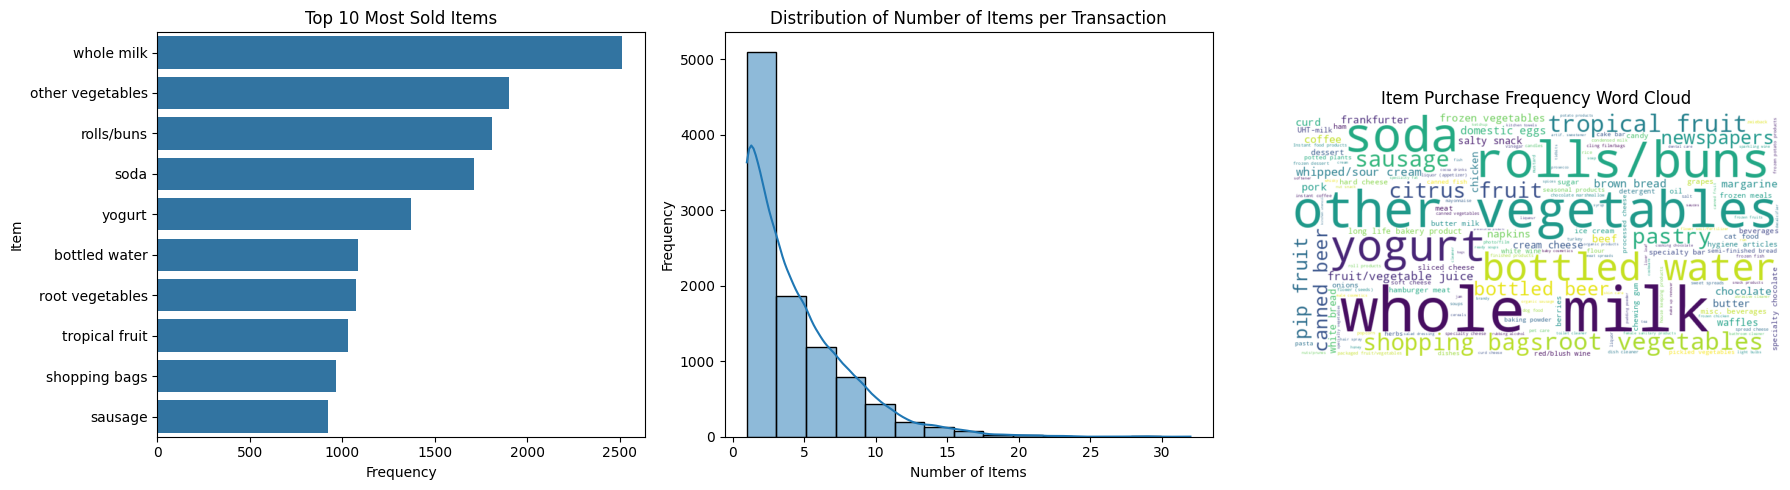

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from wordcloud import WordCloud

# Load the data
data = pd.read_csv("data.csv")

# 1. Process data to get the frequency of each item
# We'll concatenate all items in each transaction row to get a flat list of items
items = []
for index, row in data.iterrows():
    items.extend([item for item in row[1:] if pd.notna(item)])  # Exclude NaN values

# Count occurrences of each item
item_counts = Counter(items)

# Get the top 10 most sold items
top_10_items = item_counts.most_common(10)
top_10_items_df = pd.DataFrame(top_10_items, columns=['Item', 'Count'])

# 2. Prepare data for the number of items per transaction
data['Num_Items'] = data.iloc[:, 1:].notna().sum(axis=1)

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Top 10 most sold items
sns.barplot(x='Count', y='Item', data=top_10_items_df, ax=axes[0])
axes[0].set_title('Top 10 Most Sold Items')
axes[0].set_xlabel('Frequency')

# Distribution of number of items per transaction
sns.histplot(data['Num_Items'], bins=15, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Number of Items per Transaction')
axes[1].set_xlabel('Number of Items')
axes[1].set_ylabel('Frequency')

# Word cloud of items based on frequency
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(item_counts)
axes[2].imshow(wordcloud, interpolation='bilinear')
axes[2].axis('off')
axes[2].set_title('Item Purchase Frequency Word Cloud')

plt.tight_layout()
plt.show()



In [ ]:
!python3 UniqueValueCounter.py /content/data.csv>

In [ ]:
%%writefile AssociationRuleMining.py
from mrjob.job import MRJob
from mrjob.step import MRStep
from itertools import combinations

class AssociationRuleMining(MRJob):
    def configure_args(self):
        super(AssociationRuleMining, self).configure_args()
        self.add_passthru_arg(
            '--support-threshold', type=int, default=2,
            help="Minimum support threshold for itemsets"
        )

    def mapper(self, _, line):
        # Skip the header row
        if line.startswith("Item(s)") or not line.strip():
            return

        # Parse the line and extract items
        parts = line.strip().split(',')
        items = [item.strip() for item in parts[1:] if item.strip()]

        # Generate combinations of items (pairs and triplets)
        for size in range(2, 4):  # Adjust range for larger itemsets if needed
            for subset in combinations(items, size):
                yield tuple(sorted(subset)), 1

    def reducer(self, itemset, counts):
        # Calculate the total count for each itemset
        total_count = sum(counts)

        # Yield only if the count meets the support threshold
        if total_count >= self.options.support_threshold:
            yield itemset, total_count

if __name__ == '__main__':
    AssociationRuleMining.run()



Writing AssociationRuleMining.py


In [ ]:
!python3 AssociationRuleMining.py /content/data.csv> AssociationRuleMining.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/AssociationRuleMining.root.20241120.171446.813550
Running step 1 of 1...
job output is in /tmp/AssociationRuleMining.root.20241120.171446.813550/output
Streaming final output from /tmp/AssociationRuleMining.root.20241120.171446.813550/output...
Removing temp directory /tmp/AssociationRuleMining.root.20241120.171446.813550...


In [ ]:
cat AssociationRuleMining.txt

Streaming output truncated to the last 5000 lines.
["frozen vegetables", "hygiene articles", "specialty chocolate"]	2
["frozen vegetables", "hygiene articles", "spread cheese"]	2
["frozen vegetables", "hygiene articles", "sugar"]	4
["frozen vegetables", "hygiene articles", "tropical fruit"]	8
["frozen vegetables", "hygiene articles", "turkey"]	2
["frozen vegetables", "hygiene articles", "waffles"]	4
["frozen vegetables", "hygiene articles", "whipped/sour cream"]	8
["frozen vegetables", "hygiene articles", "white bread"]	5
["frozen vegetables", "hygiene articles", "whole milk"]	16
["frozen vegetables", "hygiene articles", "yogurt"]	10
["frozen vegetables", "hygiene articles"]	30
["frozen vegetables", "ice cream", "newspapers"]	4
["frozen vegetables", "ice cream", "onions"]	2
["frozen vegetables", "ice cream", "other vegetables"]	10
["frozen vegetables", "ice cream", "pastry"]	2
["frozen vegetables", "ice cream", "pickled vegetables"]	3
["frozen vegetables", "ice cream", "pip fruit"]	2
[

In [ ]:
%%writefile MarketBasketAnalysis.py
from mrjob.job import MRJob
from mrjob.step import MRStep
from itertools import combinations

class MarketBasketAnalysis(MRJob):

    def configure_args(self):
        super(MarketBasketAnalysis, self).configure_args()
        self.add_passthru_arg(
            '--support-threshold', type=int, default=2,
            help="Minimum support threshold for itemsets"
        )
        self.add_passthru_arg(
            '--pair-threshold', type=int, default=5,
            help="Minimum support threshold for item pairs"
        )

    def steps(self):
        return [
            MRStep(mapper=self.mapper_items_and_pairs, reducer=self.reducer_count_frequencies),
            MRStep(reducer=self.reducer_filter_itemsets)
        ]

    def mapper_items_and_pairs(self, _, line):
        # Skip the header row or empty lines
        if line.startswith("Item(s)") or not line.strip():
            return

        # Parse the line and extract items
        parts = line.strip().split(',')
        items = [item.strip() for item in parts[1:] if item.strip()]

        # Emit individual items and pairs
        for item in items:
            yield (item,), 1  # Emit individual items as single-element tuples
        for pair in combinations(items, 2):
            yield tuple(sorted(pair)), 1  # Emit pairs as sorted tuples

    def reducer_count_frequencies(self, itemset, counts):
        # Aggregate frequencies for itemsets
        yield itemset, sum(counts)

    def reducer_filter_itemsets(self, itemset, counts):
        total_count = sum(counts)

        # Yield only the itemsets that meet the support threshold
        if total_count >= self.options.support_threshold:
            yield itemset, total_count


if __name__ == '__main__':
    MarketBasketAnalysis.run()


Overwriting MarketBasketAnalysis.py


In [ ]:
!python MarketBasketAnalysis.py /content/data.csv> MarketBasketAnalysis.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/MarketBasketAnalysis.root.20241120.175142.835681
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/MarketBasketAnalysis.root.20241120.175142.835681/output
Streaming final output from /tmp/MarketBasketAnalysis.root.20241120.175142.835681/output...
Removing temp directory /tmp/MarketBasketAnalysis.root.20241120.175142.835681...


In [ ]:
cat MarketBasketAnalysis.txt

["canned fish", "salt"]	9
["canned fish", "salty snack"]	9
["canned fish", "sauces"]	2
["canned fish", "sausage"]	19
["canned fish", "seasonal products"]	6
["canned fish", "semi-finished bread"]	3
["canned fish", "shopping bags"]	29
["canned fish", "sliced cheese"]	6
["canned fish", "soda"]	29
["canned fish", "soft cheese"]	7
["canned fish", "soups"]	4
["canned fish", "specialty bar"]	4
["canned fish", "specialty cheese"]	5
["canned fish", "specialty chocolate"]	4
["canned fish", "specialty fat"]	2
["canned fish", "spread cheese"]	4
["canned fish", "sugar"]	10
["canned fish", "sweet spreads"]	4
["canned fish", "tea"]	3
["canned fish", "tropical fruit"]	24
["canned fish", "vinegar"]	2
["canned fish", "waffles"]	14
["canned fish", "whipped/sour cream"]	17
["canned fish", "white bread"]	8
["canned fish", "white wine"]	2
["canned fish", "whole milk"]	47
["canned fish", "yogurt"]	32
["canned fish"]	148
["canned fruit", "chicken"]	2
["canned fruit", "chocolate"]	3
["canned fruit", "citrus fr

In [ ]:
%%writefile HighPairLowIndividualSales.py
from mrjob.job import MRJob
from mrjob.step import MRStep
from itertools import combinations


class HighPairLowIndividualSales(MRJob):
    def configure_args(self):
        super(HighPairLowIndividualSales, self).configure_args()
        self.add_passthru_arg(
            '--individual-threshold', type=int, default=3,
            help="Minimum frequency threshold for individual items"
        )
        self.add_passthru_arg(
            '--pair-threshold', type=int, default=5,
            help="Minimum frequency threshold for item pairs"
        )

    def steps(self):
        return [
            MRStep(mapper=self.mapper_items_and_pairs,
                   reducer=self.reducer_count_frequencies),
            MRStep(reducer=self.reducer_high_pair_low_individual)
        ]

    def mapper_items_and_pairs(self, _, line):
        # Skip the header row and empty lines
        if line.startswith("Item(s)") or not line.strip():
            return

        # Parse the line and extract items
        parts = line.strip().split(',')
        items = [item.strip() for item in parts[1:] if item.strip()]

        # Emit individual items and pairs
        for item in items:
            yield (item,), 1  # Individual items as single-element tuples
        for pair in combinations(items, 2):
            yield tuple(sorted(pair)), 1  # Pairs as tuples

    def reducer_count_frequencies(self, itemset, counts):
        # Aggregate frequencies for individual items and pairs
        total_count = sum(counts)
        yield itemset, total_count

    def reducer_high_pair_low_individual(self, itemset, counts):
        # Initialize itemset_counts dictionary if not already initialized
        if not hasattr(self, 'itemset_counts'):
            self.itemset_counts = {}

        # Convert itemset to a tuple (ensure immutability)
        itemset = tuple(itemset)

        # Store frequencies in itemset_counts dictionary
        total_count = sum(counts)
        self.itemset_counts[itemset] = total_count

        # Emit results for pairs after the dictionary is populated
        if len(itemset) == 2:  # Only process pairs
            item_a, item_b = itemset
            individual_count_a = self.itemset_counts.get((item_a,), 0)
            individual_count_b = self.itemset_counts.get((item_b,), 0)

            # Apply thresholds: high pair frequency, low individual sales
            if (total_count >= self.options.pair_threshold and
                individual_count_a < self.options.individual_threshold and
                individual_count_b < self.options.individual_threshold):
                yield itemset, {
                    "pair_count": total_count,
                    "individual_counts": (individual_count_a, individual_count_b)
                }


if __name__ == '__main__':
    HighPairLowIndividualSales.run()


Overwriting HighPairLowIndividualSales.py


In [ ]:
!python HighPairLowIndividualSales.py /content/data.csv> HighPairLowIndividualSales.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/HighPairLowIndividualSales.root.20241120.174437.004085
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/HighPairLowIndividualSales.root.20241120.174437.004085/output
Streaming final output from /tmp/HighPairLowIndividualSales.root.20241120.174437.004085/output...
Removing temp directory /tmp/HighPairLowIndividualSales.root.20241120.174437.004085...


In [ ]:
cat HighPairLowIndividualSales.txt

["canned fish", "salt"]	{"pair_count": 9, "individual_counts": [0, 0]}
["canned fish", "salty snack"]	{"pair_count": 9, "individual_counts": [0, 0]}
["canned fish", "sausage"]	{"pair_count": 19, "individual_counts": [0, 0]}
["canned fish", "seasonal products"]	{"pair_count": 6, "individual_counts": [0, 0]}
["canned fish", "shopping bags"]	{"pair_count": 29, "individual_counts": [0, 0]}
["canned fish", "sliced cheese"]	{"pair_count": 6, "individual_counts": [0, 0]}
["canned fish", "soda"]	{"pair_count": 29, "individual_counts": [0, 0]}
["canned fish", "soft cheese"]	{"pair_count": 7, "individual_counts": [0, 0]}
["canned fish", "specialty cheese"]	{"pair_count": 5, "individual_counts": [0, 0]}
["canned fish", "sugar"]	{"pair_count": 10, "individual_counts": [0, 0]}
["canned fish", "tropical fruit"]	{"pair_count": 24, "individual_counts": [0, 0]}
["canned fish", "waffles"]	{"pair_count": 14, "individual_counts": [0, 0]}
["canned fish", "whipped/sour cream"]	{"pair_count": 17, "individual